In [7]:
!pip install qiskit

  Using cached pybind11-2.6.2-py2.py3-none-any.whl (191 kB)
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Using cached dlx-1.0.4.tar.gz (5.5 kB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)
  Using cached python-constraint-1.4.0.tar.bz2 (18 kB)
  Using cached ntlm_auth-1.5.0-py2.py3-none-any.whl (29 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
  Using cached multitasking-0.0.9.tar.gz (8.1 kB)
  Created wheel for qiskit: filename=qiskit-0.27.0-py3-none-any.whl size=10488 sha256=ceb91592bdf7ca98260b6fe721e08f469096e5b4247d2bd358279c46bb26e582
  Stored in directory: c:\users\aida\appdata\local\pip\cache\wheels\31\9b\e1\8348cc0da41a61c196a5d16b6d401534690ee73cf8c4f6cdc8
  Created wheel for dlx: filename=dlx-1.0.4-py3-none-any.whl size=5709 sha256=218e1aa69dfaeba719476a592dbbc4f6a7aa5b191d8ce601c6d60e51945c6561
  Stored in directory: c:\users\aida\appdata\local\pip\cache\wheels\c4\03\f9\7afbf40e0c

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import circuit_drawer,plot_histogram
from numpy import pi
import random
from qiskit import transpile
from qiskit.providers.aer import AerSimulator

In [53]:
#u(theta, phi,lambda):z(phi) x(-pi/2) z(theta) x(pi/2) z(-phi)
#lambda=-phi

In [11]:
# cirquit of n qubit
n=2
circuit = QuantumCircuit(n)
for qubit in range(n):
    rand = random.random()
    circuit.u(2*pi*rand, 2*pi*rand, -2*pi*rand,qubit)
    for qubit in range(n-1):
        rand = random.random()   
        circuit.rxx(2*pi*rand,qubit,qubit+1)
        
#circuit.measure(range(qubit), range(qubit))
circuit.measure_all()
circuit.draw()

┌──────────────────────────┐┌──────────────┐»
   q_0: ┤ U(2.8246,2.8246,-2.8246) ├┤0             ├»
        └──────────────────────────┘│  RXX(1.9621) │»
   q_1: ────────────────────────────┤1             ├»
                                    └──────────────┘»
meas: 2/════════════════════════════════════════════»
                                                    »
«                                    ┌──────────────┐ ░ ┌─┐   
«   q_0: ────────────────────────────┤0             ├─░─┤M├───
«        ┌──────────────────────────┐│  RXX(4.9034) │ ░ └╥┘┌─┐
«   q_1: ┤ U(1.6204,1.6204,-1.6204) ├┤1             ├─░──╫─┤M├
«        └──────────────────────────┘└──────────────┘ ░  ║ └╥┘
«meas: 2/════════════════════════════════════════════════╩══╩═
«                                                        0  1

In [5]:
# Select the AerSimulator from the Aer provider
simulator = AerSimulator(method='matrix_product_state')

# Execute the quantum circuit
tcirc = transpile(circuit, simulator)
result = simulator.run(tcirc).result()
# Obtain the counts for each measured state
counts=result.get_counts()
counts

{'101': 151,
 '001': 508,
 '111': 248,
 '110': 7,
 '000': 40,
 '100': 31,
 '010': 18,
 '011': 21}

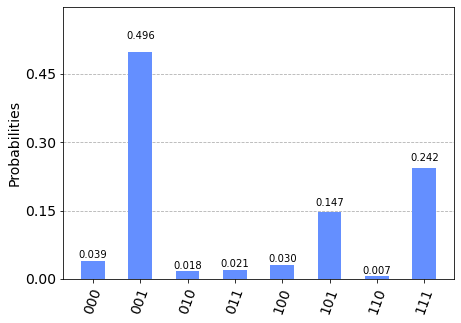

In [8]:
plot_histogram(counts)

In [12]:
# cirquit of n qubit
n=4
circuit = QuantumCircuit(n)
for qubit in range(n):
    rand = random.random()
    circuit.u(2*pi*rand, 2*pi*rand, -2*pi*rand,qubit)
    for qubit in range(n-1):
        rand = random.random()   
        circuit.rxx(2*pi*rand,qubit,qubit+1)
        
# Define a snapshot that shows the current state vector
circuit.save_statevector(label='my_sv')
circuit.save_matrix_product_state(label='my_mps')
circuit.measure_all()

# Execute and get saved data
tcirc = transpile(circuit, simulator)
result = simulator.run(tcirc).result()
data = result.data()

#print the result data
data

#print("Time taken: {} sec".format(result.time_taken))
#result.get_counts()

{'counts': {'0x6': 142,
  '0x5': 231,
  '0x7': 191,
  '0x4': 172,
  '0x0': 53,
  '0x8': 8,
  '0xb': 17,
  '0x1': 37,
  '0xf': 9,
  '0x3': 64,
  '0x2': 49,
  '0xc': 12,
  '0x9': 22,
  '0xe': 8,
  '0xa': 4,
  '0xd': 5},
 'my_sv': array([ 0.09804341-0.20214037j,  0.13633224-0.15113096j,
         0.15869307-0.16620357j, -0.07324487+0.19496468j,
         0.19437155+0.3751254j , -0.39297052-0.24609696j,
         0.28233272+0.25363318j,  0.28275793+0.3394083j ,
        -0.08441929+0.06505584j,  0.00813106-0.13130126j,
        -0.04302182+0.06855047j, -0.03382662+0.10867063j,
         0.08652822-0.02987112j,  0.08395871-0.0012206j ,
         0.0929839 -0.00335828j, -0.07712759+0.03211756j]),
 'my_mps': ([(array([[-0.62181089+0.j, -0.78316743+0.j]]),
    array([[ 0.0148474 -0.78302668j, -0.01178838+0.62169913j]])),
   (array([[ 0.79452462-0.14902924j, -0.51271866+0.26534066j,
            -0.11063035-0.14401031j,  0.09286654-0.67630206j],
           [-0.08779425-0.57776759j, -0.48832281-0.674101

In [12]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0, range(1, 5))
qc.measure_all()
qc.draw()

┌───┐                     ░ ┌─┐            
   q_0: ┤ H ├──■────■────■────■───░─┤M├────────────
        └───┘┌─┴─┐  │    │    │   ░ └╥┘┌─┐         
   q_1: ─────┤ X ├──┼────┼────┼───░──╫─┤M├─────────
             └───┘┌─┴─┐  │    │   ░  ║ └╥┘┌─┐      
   q_2: ──────────┤ X ├──┼────┼───░──╫──╫─┤M├──────
                  └───┘┌─┴─┐  │   ░  ║  ║ └╥┘┌─┐   
   q_3: ───────────────┤ X ├──┼───░──╫──╫──╫─┤M├───
                       └───┘┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ────────────────────┤ X ├─░──╫──╫──╫──╫─┤M├
                            └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════════════════════════╩══╩══╩══╩══╩═
                                     0  1  2  3  4

In [5]:
# Define a snapshot that shows the current state vector
circuit.save_statevector(label='my_sv')
circuit.save_matrix_product_state(label='my_mps')
data = result.data()
#print the result data
data

{'counts': {'0xe': 85,
  '0x5': 164,
  '0xd': 82,
  '0x2': 68,
  '0x3': 31,
  '0xa': 40,
  '0x1': 82,
  '0x8': 49,
  '0x4': 112,
  '0x6': 164,
  '0xc': 54,
  '0x9': 36,
  '0x0': 46,
  '0xb': 3,
  '0xf': 8},
 'my_sv': array([ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , -0.98863317-0.15034775j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ]),
 'my_mps': ([(array([[0.+0.j]]), array([[-0.93571041+0.35276909j]])),
   (array([[1.+0.j]]), array([[0.+0.j]])),
   (array([[-0.96368277-0.26704966j]]), array([[0.+0.j]])),
   (array([[0.+0.j]]), array([[-0.97107147-0.23878903j]]))],
  [array([1.]), array([1.]), array([1.])])}

In [10]:
# Run and get counts, using the matrix_product_state method
# Execute the quantum circuit to obtain the probability distribution associated with the state with current parameters
tcirc = transpile(circuit, simulator)
result = simulator.run(tcirc).result()
# Obtain the counts for each measured state, and convert those counts into a probability vector
counts = result.get_counts()
counts

{'00': 724, '01': 77, '11': 168, '10': 55}